# Аналитика данных с помощью pandas, matplotlib и seaborn

In [ ]:
import numpy as np
import pandas as pd  # Стандартное сокращение для pandas.
import matplotlib.pyplot as plt  # Стандартное сокращение для matplotlib

Мы будем работать с датасетом ``Титаник``

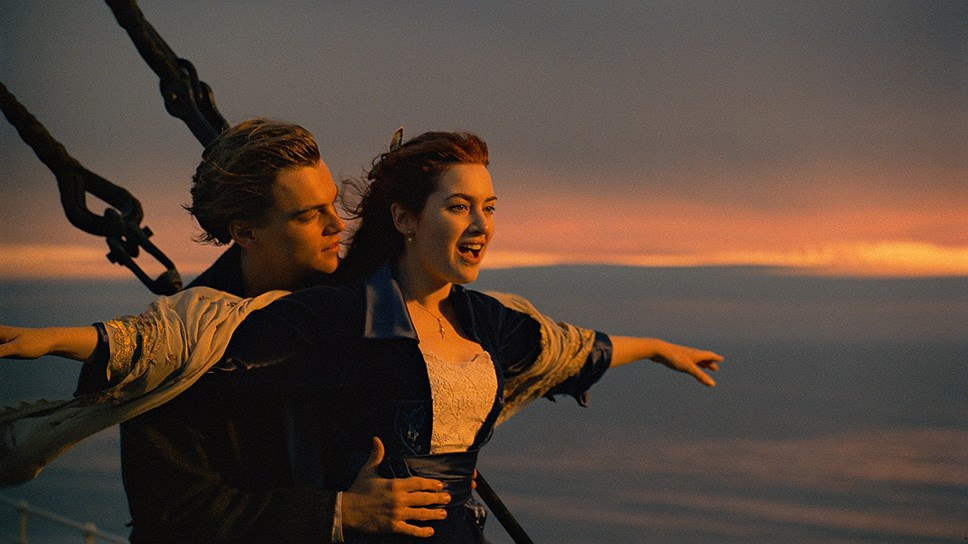


Информация о файлах:
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)




## Полезные функции библиотеки Pandas

Документация библиотеки Pandas: https://pandas.pydata.org/docs/

Здесь в поиске можно искать названия функций/методов и открывать подробную информацию по ним.

### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.



Загрузим первый файл. Ссылка на его скачивание: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
!ls

sample_data  titanic.csv


In [ ]:
titanic_passengers = pd.read_csv('titanic.csv', index_col='PassengerId')

In [ ]:
titanic_passengers.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Информация о столбцах:

- **PassengerId**: уникальный id пассажира
- **Pclass**: класс каюты, в которой ехал пассажир (1, 2 или 3)
- **Name**: имя пассажира
- **Sex**: пол пассажира
- **Age**: возраст пассажира
- **SibSp**: общее количество братьев, сестер и супругов пассажира, которые также ехали на Титанике
- **Parch**: общее количество родителей и детей пассажира, которые также ехали на Титанике
- **Ticket**: номер билета пассажира
- **Fare**: стоимость билета пассажира
- **Cabin**: номер каюты пассажира
- **Embarked**: в каком порту пассажир сел на Титаник:
  - **S**: Southhampton
  - **C**: Cherbourg
  - **Q**: Queenstown

### Получение общей информации о датасете

Выведем shape нашей таблицы: информацию о том, сколько в ней строк и столбцов:

In [ ]:
titanic_passengers.shape

(891, 11)

Метод info() выдает информацию:
- сколько в каждой из колонок таблицы пропусков;
- тип каждой колонки.

In [ ]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Метод .describe() для каждой числовой колонки выдает информацию о статистиках:
- **count**: количество не-NaN значений в колонке;
- **mean**: арифметическое среднее значений в колонке;
- **std**: стардартное отклонение значений в колонке;
- **min**: минимальное значение в колонке;
- **25%**: 25-процентная перцентиль значений в колонке;
- **50%**: 50-процентная перцентиль значений в колонке;
- **75%**: 75-процентная перцентиль значений в колонке;
- **max**: максимальное значение в колонке;

In [ ]:
titanic_passengers.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Работа с отдельными столбцами.

In [ ]:
# Очень богатые американцы
titanic_passengers[titanic_passengers['Fare'] > 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


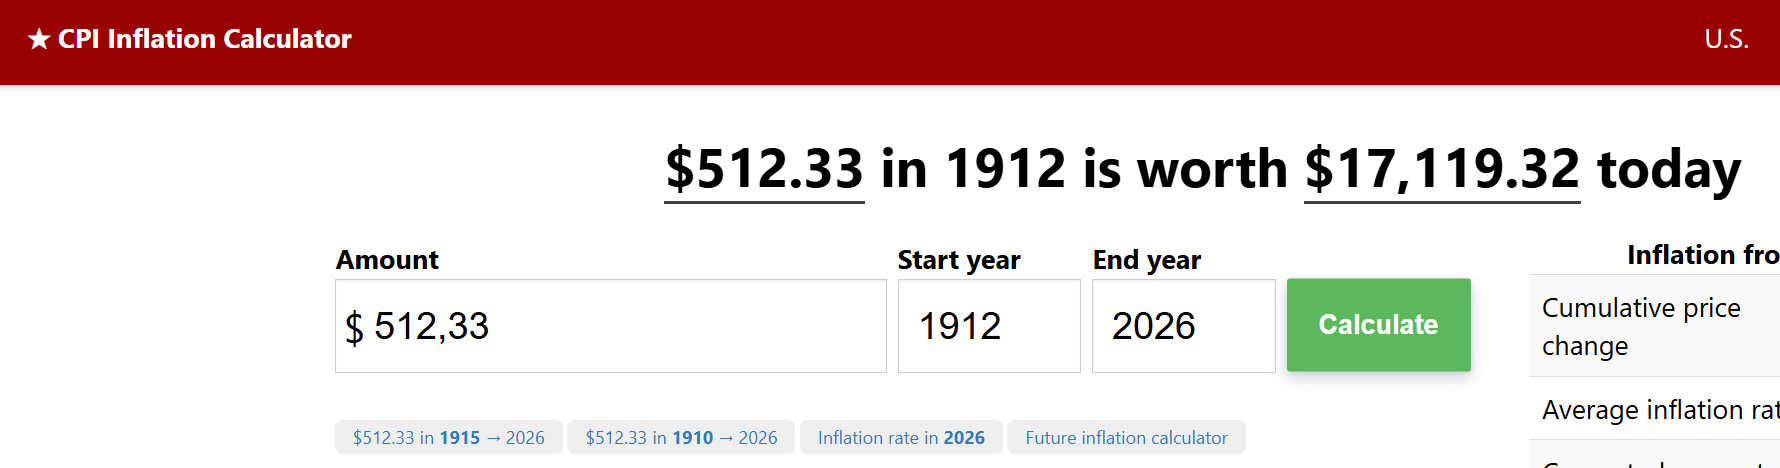

In [ ]:
# 15 человек, из выборки пассажиров, плыли бесплатно
titanic_passengers[titanic_passengers['Fare'] < 1e-2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [ ]:
titanic_passengers[(titanic_passengers['Fare'] > 1e-2) & (titanic_passengers['Fare'] < 7)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S


### Пассажир 873 скорее всего выброс, т.к. билет первого класса не может стоить 5 долларов. Может он скидку получил в 90%... Не думаю.

In [ ]:
titanic_passengers.iloc[872]

,873
Survived,0
Pclass,1
Name,"Carlsson, Mr. Frans Olof"
Sex,male
Age,33.0
SibSp,0
Parch,0
Ticket,695
Fare,5.0
Cabin,B51 B53 B55


Чтобы взять отдельный столбец данных, нужно записать его название в квадратных скобках. Далее со столбуом можно работать примерно как с массивом. Например, можно найти минимальное/максимальное значение в столбце:

In [ ]:
titanic_passengers['Age'].min()

In [ ]:
titanic_passengers['Age'].max(), titanic_passengers['Age'].mean(), titanic_passengers['Age'].std()

Можно также перевести столбец в тип numpy и работать с ним как с обычным numpy массивом:

In [ ]:
age_numpy = np.array(titanic_passengers['Age'])
age_numpy

Можно построить [гистограммы](https://ru.wikipedia.org/wiki/Гистограмма) числовых столбцов:

In [ ]:
titanic_passengers['Age'].hist(bins=20)

Гистограммы также можно строить с помощью matplotlib:

In [ ]:
plt.hist(titanic_passengers['Age'], bins=20);

Метод value_counts() выводит все уникальные значения, встречающиеся в колонке, и сколько раз каждое значение встречается в колонке. Эта функция полезна для столбцов, в которых не очень большое количество уникальных значений.

In [ ]:
titanic_passengers['Sex'].value_counts()

In [ ]:
titanic_passengers['Pclass'].value_counts()

Для колонки Age вывод метода value_counts() будет не очень информативным, потому что в колонке Age слишком много уникальных значений. Для таких колонок, в которых много уникальных значений, лучше строить гистограммы, как мы это сделали выше.

In [ ]:
titanic_passengers['Age'].value_counts()

### Индексирование по условиям

Индексирование по условиям — это когда мы хотим выбрать из всей таблицы только те строки, которые соответствуют некоторому условию. Например, мы можем хотеть выделить из датсета только строки, которые соответствуют пассажирам мужского пола (т.е. те строки, у которых в колонке Sex стоит значение male)

Делается это так:

In [ ]:
titanic_male = titanic_passengers[ titanic_passengers['Sex'] == 'male' ]

In [ ]:
titanic_male.head()

Убедимся, что в titanic_male только пассажиры мужского пола:

In [ ]:
titanic_male['Sex'].value_counts()

Также можно использовать условия вида >, <, >=, <=:

In [ ]:
titanic_passengers[ titanic_passengers['Age'] >= 18 ]

Можно задавать более сложные условия: комбинацию несколько простых условий. Например, выделим из датасета те строки, которые сооветствуют мужчинам в возрасте от 18 до 22 лет. То есть, мы хотим те строки, у которых:

"в колонке Sex стоит значение male И в колонке Age значение больше 18 И в колонке Age значение меньше 18"

Для этого нужно записать внутри квадратных скобок все три условия, каждый в своих круглых скобках. И между условиями поставить знак & (он означает "И")

In [ ]:
titanic_passengers[(titanic_passengers['Age'] > 18) & (titanic_passengers['Age'] < 22) & (titanic_passengers['Sex'] == 'male')]

Также можно комбинировать условия с помощью ИЛИ. Это знак |

In [ ]:
titanic_passengers[(titanic_passengers['Pclass'] == 1) | (titanic_passengers['Pclass'] == 2)]

Можно задавать условие вида "значение в столбце Pclass этой строки лежит в массиве [1, 2]":

In [ ]:
titanic_passengers[titanic_passengers['Pclass'].isin([1, 2])]

### Модификации датасета, создание новых колонок


Создадим новую колонку, в которую запишем для каждого пассажира общее число его родственников на борту Титаника. Это просто сумма колонок SibSP и Parch:

In [ ]:
total_relatives = titanic_passengers['SibSp'] + titanic_passengers['Parch']
total_relatives

И добавим эту колонку к таблице. Назовем ее "TotalRelatives":

In [ ]:
titanic_passengers['TotalRelatives'] = total_relatives

In [ ]:
titanic_passengers.head()

Отлично, добавлять колонки научились. Но иногда нужно их и удалять. Удалять можно с помощью метода drop():

In [ ]:
titanic_passengers = titanic_passengers.drop(columns=['SibSp', 'Parch'])
titanic_passengers.head()

Можно изменять часть значений колонки по некоторому условию. Например,изменим колонку Sex на числовую: вместо ‘male’ напишем 0, вместо ‘female’ — 1.

Вот как можно заменить все значения 'male' на 0 в колонке Sex:


In [ ]:
titanic_passengers.loc[ titanic_passengers['Sex']=='male', 'Sex'] = 0

И аналогично заменим все значения 'female' на 1:

In [ ]:
titanic_passengers.loc[ titanic_passengers['Sex']=='female', 'Sex'] = 1

In [ ]:
titanic_passengers.head()

### Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

Загрузим вторую часть нашей таблицы: titanic_surv.csv. Ссылка на файл: https://www.dropbox.com/s/eejk9byazl7tqi7/titanic_surv.csv?dl=0

In [ ]:
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_surv.head()

Соединим таблицы titakic_passengers и titanic_surv в одну, используя метод .join(). Слияние происходит по колонке индексов: PassengerId

In [ ]:
titanic_passengers = titanic_passengers.join(titanic_surv)
titanic_passengers.head()

### Индексация строк таблицы

Мы умеем получать отдельные столбцы таблицы:

In [ ]:
titanic_passengers['Age']

А вот строку таким же способом получить не выйдет:

In [ ]:
titanic_passengers[1]

Чтобы получить первую по счету строку (нумерация строк идет сверху вниз и начинается с нуля), нужно написать .iloc[1]:

In [ ]:
titanic_passengers.iloc[1]

Далее у полученной строки можно брать значения разных столбцов:

In [ ]:
titanic_passengers.iloc[1]['Name']

Чтобы сразу получать значение по строке и столбцу, можно использовать метод .loc.

Внимание: метод loc берет номер строки из колонки индексов (PassengerId в нашем случае). Поэтому индекс 1 будет соответствовать самой верхней строке таблицы.

In [ ]:
titanic_passengers.loc[1, 'Name']

Значения в ячейках можно изменять:

In [ ]:
titanic_passengers.loc[1, 'Name'] = 'Petya'

In [ ]:
titanic_passengers.head()

### Pandas и циклы

Никогда не стоит делать циклы по элементам Pandas-таблиц. Это работает очень долго. Давайте в этом убедимся:

Попробуем сделать цикл по строкам таблицы и проверить, сколько времени это займет.

Давайте сделаем цикл для подсчета количества людей в таблице, которые старше 20 лет.

In [ ]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers)):
  if titanic_passengers.iloc[i]['Age'] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

А теперь посчитаем то же самое (количество людей, старше 20 лет), с помощью индексирования по условию:

In [ ]:
import time

start_time = time.time()

num_people_older_20 = len(titanic_passengers[titanic_passengers['Age']>20])

end_time = time.time()
print('Seconds:', end_time-start_time)

Насколько быстрее это работает!

Вместо цикла при работе с Pandas-таблицей лучше использовать методы Pandas. Практически любую задачу можно решить без цикла, а используя встроенные методы Pandas.

Но если все же очень хочется сделать цикл, то лучше перед этим перевести таблицу в numpy-массив:

In [ ]:
titanic_passengers_np = np.array(titanic_passengers)

In [ ]:
titanic_passengers_np

In [ ]:
titanic_passengers_np[0]

Напишем тот же цикл, только с titanic_passengers_np вместо titanic_passengers:

In [ ]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers_np)):
  if titanic_passengers_np[i][3] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Насколько быстрее это работает!

## Визуализация данных

Импортируем библиотеки. Если вы импортировали библиотеки выше, то второй раз делать это не нужно.

In [ ]:
import numpy as np
import pandas as pd

Загрузим данные и сольем две таблицы в одну:

In [ ]:
titanic_passengers = pd.read_csv('titanic_data.csv', index_col='PassengerId')
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_passengers = titanic_passengers.join(titanic_surv)
titanic_passengers.head()

Переведем колонку Sex в числовой вид: male заменим на 1, female на 0:

In [ ]:
sex = titanic_passengers['Sex']

sex = (sex == 'male').astype(int)
titanic_passengers['Sex'] = sex

titanic_passengers.head()

Переведем колонку Embarked в числовой вид:

In [ ]:
titanic_passengers['Embarked'].value_counts()

In [ ]:
embarked = titanic_passengers['Embarked']

embarked_dict = {
    'S': 0,
    'C': 1,
    'Q': 2
}

embarked = embarked.map(embarked_dict)
titanic_passengers['Embarked'] = embarked
titanic_passengers.head()

### Matplotlib Scatter

In [ ]:
import matplotlib.pyplot as plt

Функция Scatter позволяет визуализировать точки на декартовой плоскости по их координатам.

Документация scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
plt.scatter(titanic_passengers['Age'], titanic_passengers['Fare'], c=titanic_passengers['Survived'])

plt.xlabel('Age')
plt.ylabel('Fare')

### Seaborn
Ещё одна полезная библиотека для визуализации данных --- Seaborn.

In [ ]:
import seaborn as sns

#### Pairplot

Функция Pairplot позволяет получать такие же визуализации, как мы строили выше с помощью Scatter, для всех пар числовых колонок сразу.

Документация pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
sns.pairplot(titanic_passengers, hue="Survived")

#### Матрица корреляций

В Pandas можно легко получить матрицу коэффициентов корреляций всех числовых признаков между собой:

In [ ]:
titanic_passengers.corr()

А с помощью функции heatmap библиотеки Seaborn можно наглядно визуализировать эту матрицу.

Документация heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
sns.heatmap(titanic_passengers.corr(), annot=True)

#### Countplot
Ещё одна полезная функция в seaborn называется countplot. Документация countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
sns.countplot(titanic_passengers['Pclass'], hue=titanic_passengers["Survived"])

Countplot логично применять к тем колонкам, у которых не очень много уникальных значений. Вот, например, как выглядит визуализация колонки Age с помощью countplot: не очень-то информативно.

In [ ]:
sns.countplot(titanic_passengers['Age'], hue=titanic_passengers["Survived"])